In [65]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate

In [66]:
# Loading the exchanges
bitsmap = pd.read_csv('Bitstamp_BTCUSD_2020_minute.csv')
gemini = pd.read_csv('gemini_BTCUSD_2020_1min.csv')
binance = pd.read_csv('Binance_BTCUSDT_minute.csv')

In [67]:
bitsmap.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1609459140,12/31/2020 23:59,BTC/USD,28982.44,29024.59,28969.83,28992.79,5.897679,170990.18290
1,1609459080,12/31/2020 23:58,BTC/USD,29044.79,29048.62,29000.12,29000.12,20.362289,590508.83780
2,1609459020,12/31/2020 23:57,BTC/USD,29039.53,29048.63,29023.26,29044.79,14.503728,421257.72150
3,1609458960,12/31/2020 23:56,BTC/USD,29052.02,29059.42,29039.28,29039.53,2.707583,78626.92585
4,1609458900,12/31/2020 23:55,BTC/USD,29036.10,29052.02,29025.78,29052.02,7.631439,221708.70540


In [68]:
gemini.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1.609460e+12,12/31/2020 23:59,BTCUSD,28993.75,28995.49,28951.44,28979.74,0.337088
1,1.609460e+12,12/31/2020 23:58,BTCUSD,29017.39,29019.86,28993.75,28993.75,0.079929
2,1.609460e+12,12/31/2020 23:57,BTCUSD,29035.97,29035.97,29017.39,29017.39,0.013799
3,1.609460e+12,12/31/2020 23:56,BTCUSD,29036.19,29036.19,29022.59,29035.97,0.199008
4,1.609460e+12,12/31/2020 23:55,BTCUSD,29043.69,29043.69,29025.75,29036.19,0.082642


In [69]:
binance.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
0,1.628130e+12,8/5/2021 1:05,BTC/USDT,39369.67,39394.00,39338.53,39361.02,38.950155,1533056.492,2341
1,1.628130e+12,8/5/2021 1:04,BTC/USDT,39434.95,39436.77,39364.06,39369.67,46.405522,1827912.564,1604
2,1.628130e+12,8/5/2021 1:03,BTC/USDT,39396.36,39440.69,39363.55,39434.95,121.355510,4780574.713,3329
3,1.628130e+12,8/5/2021 1:02,BTC/USDT,39570.01,39570.01,39388.00,39396.36,207.697394,8198434.082,4960
4,1.628130e+12,8/5/2021 1:01,BTC/USDT,39592.99,39600.00,39559.77,39570.02,33.148678,1312016.761,1462


In [70]:
# Converting date column type to datetime
bitsmap['date'] = pd.to_datetime(bitsmap['date'])
gemini['Date'] = pd.to_datetime(gemini['Date'])
binance['date'] = pd.to_datetime(binance['date'])

In [71]:
binance = binance[(binance['date']> '2020') & (binance['date']<'2021')]

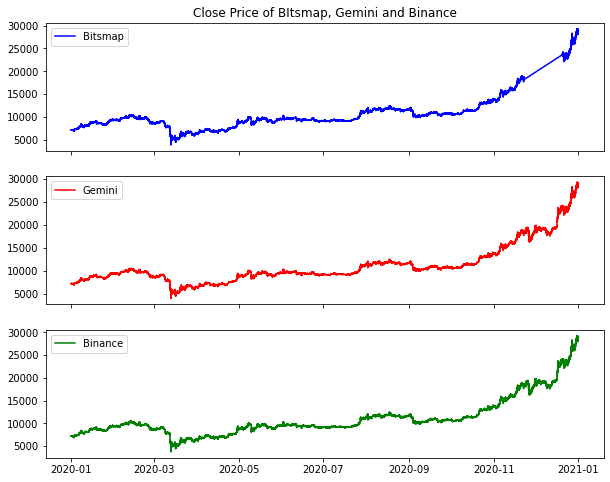

In [72]:

# Plot the close price of both the exchanges
fig, ax = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
ax[0].title.set_text('Close Price of BItsmap, Gemini and Binance')
ax[0].plot(bitsmap['date'], bitsmap['close'], color='b', label='Bitsmap')
ax[0].legend()
ax[1].plot(gemini['Date'], gemini['Close'], color='r', label='Gemini')
ax[1].legend()
ax[2].plot(binance['date'], binance['close'], color='g', label='Binance')
ax[2].legend()

In [73]:
# Renaming the columns of bitsmap 
bitsmap.rename(columns = {'close':'Close','date':'Date'}, inplace = True)
binance.rename(columns = {'close':'Close','date':'Date'}, inplace = True)

# filtering the data to only data and close value
bitsmap = bitsmap[['Date','Close']]
gemini = gemini[['Date','Close']]
df1 = bitsmap.merge(gemini, on = 'Date', how = 'inner', right_index = False)
df2 = bitsmap.merge(binance, on = 'Date', how = 'inner', right_index = False)
df3 = gemini.merge(binance, on = 'Date', how = 'inner', right_index = False)

# Sorting the values according to date
df1.sort_values('Date', inplace = True)
df2.sort_values('Date', inplace = True)
df3.sort_values('Date', inplace = True)

In [74]:
# Calculating the cross corelation using scipy.signal.correlate function and method fft
corr1 = correlate(df1['Close_x'] , df1['Close_y'], mode='same', method='fft') 
corr2 = correlate(df2['Close_x'] , df2['Close_y'], mode='same', method='fft') 
corr3 = correlate(df3['Close_x'] , df3['Close_y'], mode='same', method='fft') 

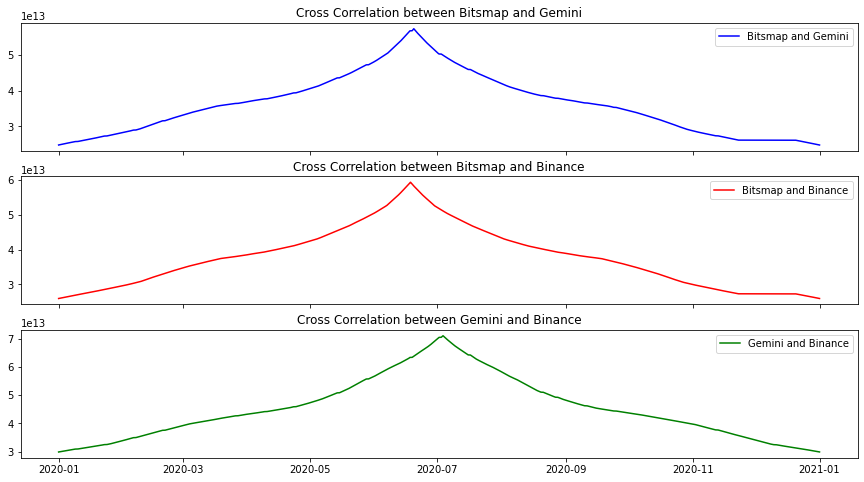

In [75]:
# plot for cross corelation for full year 
fig, ax = plt.subplots(3, 1, figsize=(15, 8), sharex=True)
ax[0].title.set_text('Cross Correlation between Bitsmap and Gemini')
ax[0].plot(df1['Date'], corr1, color='b', label='Bitsmap and Gemini')
ax[0].legend()
ax[1].title.set_text('Cross Correlation between Bitsmap and Binance')
ax[1].plot(df2['Date'], corr2, color='r', label='Bitsmap and Binance')
ax[1].legend()
ax[2].title.set_text('Cross Correlation between Gemini and Binance')
ax[2].plot(df3['Date'], corr3, color='g', label='Gemini and Binance')
ax[2].legend()

In [76]:
# time delay between the bitsmap and gemini for full year 2020
def compute_delay(x, y):
#     assert len(x) == len(y)
    c = correlate(x, y, mode='same', method='fft')
    assert len(c) == len(x)
    zero_index = int(len(x) / 2) - 1
    delay = zero_index - np.argmax(c)
    return delay

delay = compute_delay(df1['Close_x'] , df1['Close_y'])
print('Delay between bitsmap and gemini : ',delay)


Delay between bitsmap and gemini :  -1


In [78]:
df = df1

In [79]:
# time delay between the bitsmap and gemini for january 2020
new_df = df[df['Date']<'2020-02']
corr = correlate(new_df['Close_x'], new_df['Close_y'], mode='same')
delay = compute_delay(new_df['Close_x'], new_df['Close_y'])
print(delay)

-1


In [80]:
# time delay between the bitsmap and gemini for February 2020
new_df = df[(df['Date']<'2020-03') & (df['Date']>'2020-02')] 
delay = compute_delay(new_df['Close_x'], new_df['Close_y'])
print(delay)

-1


In [81]:
# time delay between the bitsmap and gemini for March 2020
new_df = df[(df['Date']<'2020-04') & (df['Date']>'2020-03')]
delay = compute_delay(new_df['Close_x'], new_df['Close_y'])
print(delay)

-1


In [82]:
# time delay between the bitsmap and gemini for July 2020
new_df = df[(df['Date']<'2020-08') & (df['Date']>'2020-07')]
delay = compute_delay(new_df['Close_x'], new_df['Close_y'])
print(delay)

-1


In [83]:
correlation_df = pd.DataFrame(columns = ['Bitsmap/Gemini','Bitsmap/Binance','Gemini/Binance'])
correlation_df['Bitsmap/Gemini'] = corr1
correlation_df['Bitsmap/Binance'] = corr2[:len(correlation_df)]
correlation_df['Gemini/Binance'] = corr3[:len(correlation_df)]

<AxesSubplot:>

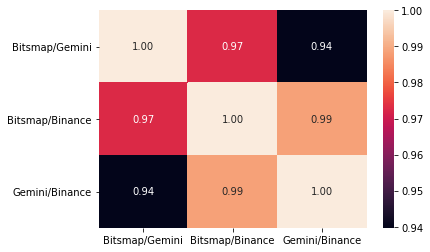

In [84]:
import seaborn as sns
sns.heatmap(correlation_df.corr(),annot=True,linecolor="blue",fmt=".2f")